# RNNImplementation

 In this assignment, you will implement your first Recurrent Neural Network in numpy.

Recurrent Neural Networks (RNN) are very effective for Natural Language Processing and other sequence tasks because they have "memory". They can read inputs  x⟨t⟩  (such as words) one at a time, and remember some information/context through the hidden layer activations that get passed from one time-step to the next. This allows a uni-directional RNN to take information from the past to process later inputs. A bidirection RNN can take context from both the past and the future.

Notation:

* Superscript  $[l]$  denotes an object associated with the  $l^{th}$  layer.

  * Example:  $a^{[4]} $  is the  $4^{th}$  layer activation.  $W^{[5]}$  and  $b^{[5]}$  are the  $5^{th}$  layer parameters.
* Superscript  $(i)$  denotes an object associated with the  $i^{th}$  example.

  * Example:  $x^{(i)}$  is the  $i^{th}$  training example input.
* Superscript  $⟨t⟩$  denotes an object at the  $t^{th}$  time-step.

  * Example:  $x^{⟨t⟩}$  is the input x at the  $t^{th}$  time-step.  $x^{(i)⟨t⟩}$  is the input at the  $t^{th}$  timestep of example  $i$ .
* Lowerscript  $i$  denotes the  $i^{th}$  entry of a vector.

  * Example:  $a^{[l]}_i$  denotes the  $i^{th}$  entry of the activations in layer  $l$ .

In [1]:
import numpy as np

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


## 1 - Forward propagation for the basic Recurrent Neural Network
The basic RNN that you will implement has the structure below. In this example,  $ T_x=T_y$

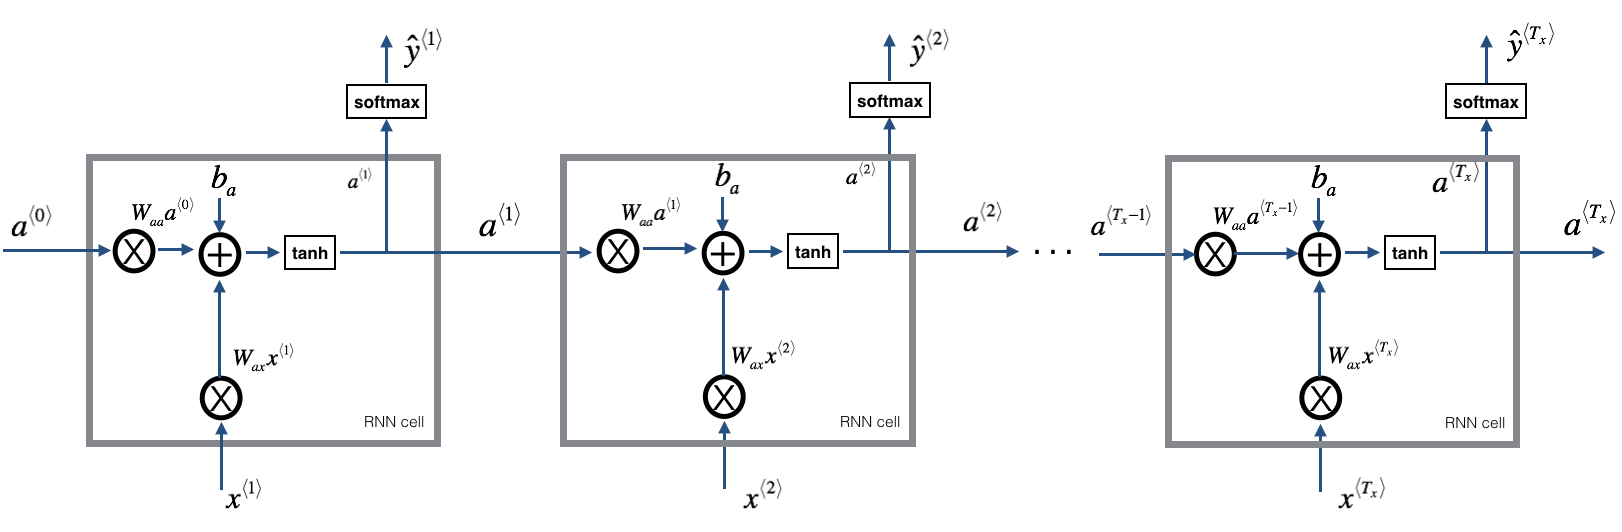



Here's how you can implement an RNN:

**Steps:**

1. Implement the calculations needed for one time-step of the RNN.
2. Implement a loop over  Tx  time-steps in order to process all the inputs, one at a time.
Let's go!

### RNN cell
A Recurrent neural network can be seen as the repetition of a single cell. You are first going to implement the computations for a single time-step. The following figure describes the operations for a single time-step of an RNN cell.

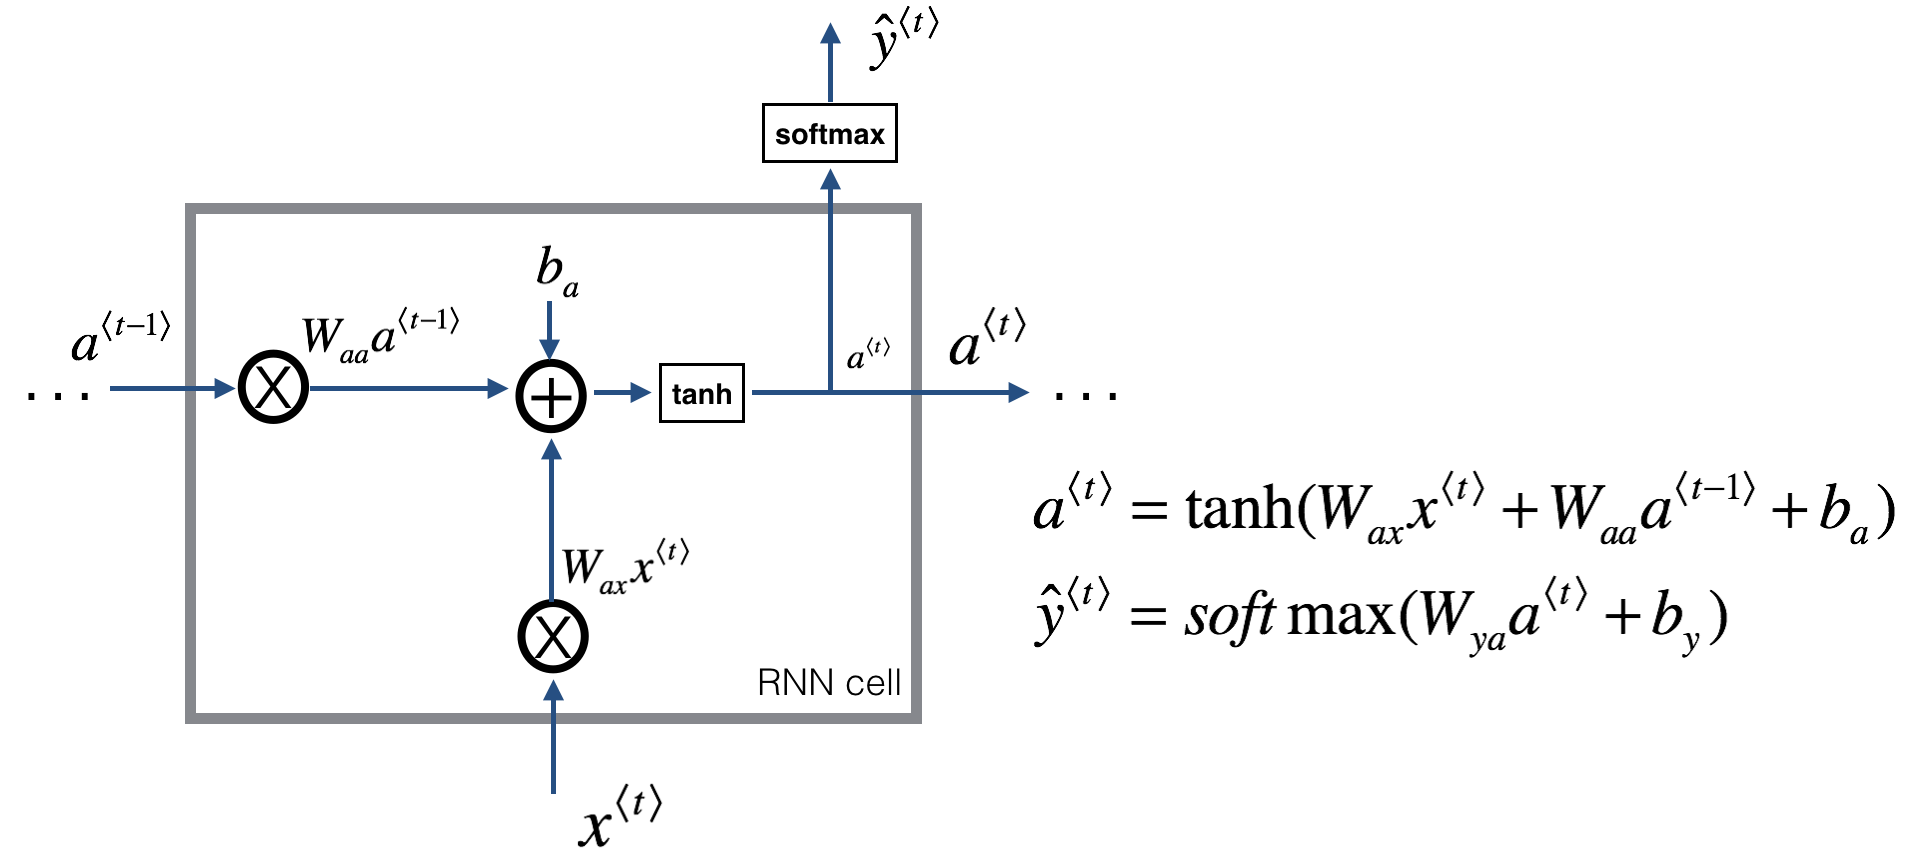
-> Figure 2 :  Basic RNN cell. Takes as input  $x^{⟨t⟩}$  (current input) and  $a^{⟨t−1⟩}$  (previous hidden state containing information from the past), and outputs  $a^{⟨t⟩}$  which is given to the next RNN cell and also used to predict  $y^{⟨t⟩}$


Exercise: Implement the RNN-cell described in Figure (2).

Instructions:

Compute the hidden state with tanh activation:  a⟨t⟩=tanh(Waaa⟨t−1⟩+Waxx⟨t⟩+ba) .
Using your new hidden state  a⟨t⟩ , compute the prediction  y^⟨t⟩=softmax(Wyaa⟨t⟩+by) . We provided you a function: softmax.
Store  (a⟨t⟩,a⟨t−1⟩,x⟨t⟩,parameters)  in cache
Return  a⟨t⟩  ,  y⟨t⟩  and cache
We will vectorize over  m  examples. Thus,  x⟨t⟩  will have dimension  (nx,m) , and  a⟨t⟩  will have dimension  (na,m) .

**Exercise: Implement the RNN-cell described in Figure (2).**

Instructions:

1. Compute the hidden state with tanh activation:  $ a^{⟨t⟩} =tanh(W_{aa}a^{⟨t−1⟩}+W_{ax}x^{⟨t⟩}+b_a )$.
2. Using your new hidden state  $a^{⟨t⟩}$ , compute the prediction  $y^{⟨t⟩}=softmax(W_{ya}a^{⟨t⟩}+b_y)$ . We provided you a function: softmax.
3. Store  $(a⟨t⟩,a⟨t−1⟩,x⟨t⟩,parameters)$  in cache
4. Return  $a⟨t⟩  ,  y⟨t⟩$  and cache
5. We will vectorize over  m  examples. Thus,  $x⟨t⟩$  will have dimension  $(n_x,m)$ , and  $a⟨t⟩$  will have dimension  $(n_a,m)$ .

In [3]:

def rnn_cell_forward(xt, a_prev, parameters):
    """
    Implements a single forward step of the RNN-cell as described in Figure (2)

    Arguments:
    xt -- your input data at timestep "t", numpy array of shape (n_x, m).
    a_prev -- Hidden state at timestep "t-1", numpy array of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        ba --  Bias, numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
    Returns:
    a_next -- next hidden state, of shape (n_a, m)
    yt_pred -- prediction at timestep "t", numpy array of shape (n_y, m)
    cache -- tuple of values needed for the backward pass, contains (a_next, a_prev, xt, parameters)
    """
    
    # Retrieve parameters from "parameters"
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]
    
    ### START CODE HERE ### (≈2 lines)
    # compute next activation state using the formula given above
    a_next =  np.tanh(np.dot(Waa, a_prev) + np.dot(Wax, xt) + ba)
    # compute output of the current cell using the formula given above
    yt_pred = softmax(np.dot(Wya, a_next) + by)
    ### END CODE HERE ###
    
    # store values you need for backward propagation in cache
    cache = (a_next, a_prev, xt, parameters)
    
    return a_next, yt_pred, cache

In [4]:
np.random.seed(1)
xt = np.random.randn(3,10)
a_prev = np.random.randn(5,10)
Waa = np.random.randn(5,5)
Wax = np.random.randn(5,3)
Wya = np.random.randn(2,5)
ba = np.random.randn(5,1)
by = np.random.randn(2,1)
parameters = {"Waa": Waa, "Wax": Wax, "Wya": Wya, "ba": ba, "by": by}

a_next, yt_pred, cache = rnn_cell_forward(xt, a_prev, parameters)
print("a_next[4] = ", a_next[4])
print("a_next.shape = ", a_next.shape)
print("yt_pred[1] =", yt_pred[1])
print("yt_pred.shape = ", yt_pred.shape)

a_next[4] =  [ 0.59584544  0.18141802  0.61311866  0.99808218  0.85016201  0.99980978
 -0.18887155  0.99815551  0.6531151   0.82872037]
a_next.shape =  (5, 10)
yt_pred[1] = [0.9888161  0.01682021 0.21140899 0.36817467 0.98988387 0.88945212
 0.36920224 0.9966312  0.9982559  0.17746526]
yt_pred.shape =  (2, 10)


**Expected Output**

|value | output|
|------|--------|
|a_next[4] =  | [ 0.59584544  0.18141802  0.61311866  0.99808218, 0.85016201  0.99980978 -0.18887155  0.99815551  0.6531151   0.82872037] |
|a_next.shape = | (5, 10) |
|yt_pred[1] = | [0.9888161  0.01682021 0.21140899 0.36817467 0.98988387 |0.88945212 0.36920224 0.9966312  0.9982559  0.17746526] |
|yt_pred.shape = | (2, 10) |

## RNN forward pass
You can see an RNN as the repetition of the cell you've just built. If your input sequence of data is carried over 10 time steps, then you will copy the RNN cell 10 times. Each cell takes as input the hidden state from the previous cell ( $a^{⟨t−1⟩}$ ) and the current time-step's input data ( $x⟨t⟩$ ). It outputs a hidden state ( $a⟨t⟩$ ) and a prediction ( $y⟨t⟩$ ) for this time-step.

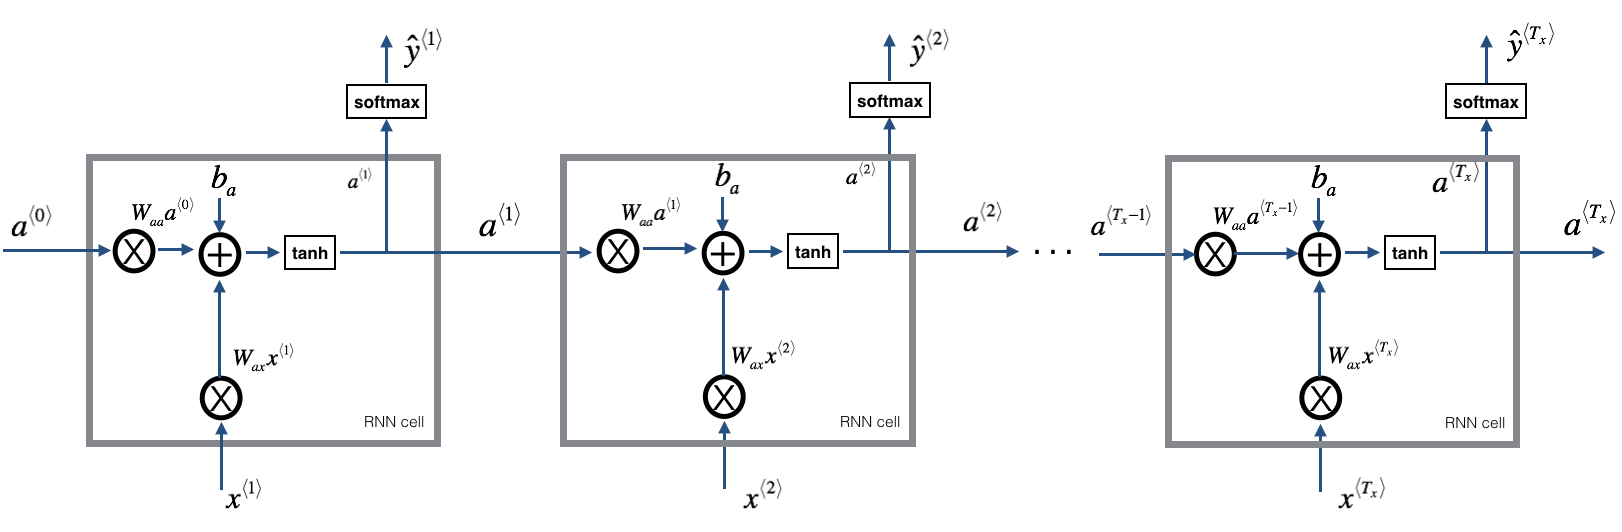

**Figure 3**: Basic RNN. The input sequence  $x=(x^{⟨1⟩},x^{⟨2⟩},...,x^{⟨Tx⟩})$  is carried over  $T_x$  time steps. The network outputs  $y=(y^{⟨1⟩},y^{⟨2⟩},...,y^{⟨Tx⟩})$ .

**Exercise**: Code the forward propagation of the RNN described in Figure (3).

**Instructions**:

1. Create a vector of zeros $( a )$ that will store all the hidden states computed by the RNN.
2. Initialize the "next" hidden state as  $a_0$  (initial hidden state).
    * Start looping over each time step, your incremental index is  $t$  :
    * Update the "next" hidden state and the cache by running rnn_cell_forward
    * Store the "next" hidden state in  $a$  ( $t^{th}  position)
    * Store the prediction in $y$
    * Add the cache to the list of caches
3. Return  $a ,  y$  and caches

In [5]:
def rnn_forward(x, a0, parameters):
    """
    Implement the forward propagation of the recurrent neural network described in Figure (3).

    Arguments:
    x -- Input data for every time-step, of shape (n_x, m, T_x).
    a0 -- Initial hidden state, of shape (n_a, m)
    parameters -- python dictionary containing:
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        ba --  Bias numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)

    Returns:
    a -- Hidden states for every time-step, numpy array of shape (n_a, m, T_x)
    y_pred -- Predictions for every time-step, numpy array of shape (n_y, m, T_x)
    caches -- tuple of values needed for the backward pass, contains (list of caches, x)
    """
    
    # Initialize "caches" which will contain the list of all caches
    caches = []
    
    # Retrieve dimensions from shapes of x and Wy
    n_x, m, T_x = x.shape
    n_y, n_a = parameters["Wya"].shape
    
    ### START CODE HERE ###
    
    # initialize "a" and "y" with zeros (≈2 lines)
    a = np.zeros((n_a, m, T_x))
    y_pred = np.zeros((n_y, m, T_x))
    # Initialize a_next (≈1 line)
    a_next = a0
    
    # loop over all time-steps
    for t in range(T_x):
        # Update next hidden state, compute the prediction, get the cache (≈1 line)
        a_next, yt_pred, cache = rnn_cell_forward(x[:,:,t], a_next, parameters)
        # Save the value of the new "next" hidden state in a (≈1 line)
        a[:,:,t] = a_next
        # Save the value of the prediction in y (≈1 line)
        y_pred[:,:,t] = yt_pred
        # Append "cache" to "caches" (≈1 line)
        caches.append(cache)
        
    ### END CODE HERE ###
    
    # store values needed for backward propagation in cache
    caches = (caches, x)
    
    return a, y_pred, caches

In [6]:
np.random.seed(1)
x = np.random.randn(3,10,4)
a0 = np.random.randn(5,10)
Waa = np.random.randn(5,5)
Wax = np.random.randn(5,3)
Wya = np.random.randn(2,5)
ba = np.random.randn(5,1)
by = np.random.randn(2,1)
parameters = {"Waa": Waa, "Wax": Wax, "Wya": Wya, "ba": ba, "by": by}

a, y_pred, caches = rnn_forward(x, a0, parameters)
print("a[4][1] = ", a[4][1])
print("a.shape = ", a.shape)
print("y_pred[1][3] =", y_pred[1][3])
print("y_pred.shape = ", y_pred.shape)
print("caches[1][1][3] =", caches[1][1][3])
print("len(caches) = ", len(caches))

a[4][1] =  [-0.99999375  0.77911235 -0.99861469 -0.99833267]
a.shape =  (5, 10, 4)
y_pred[1][3] = [0.79560373 0.86224861 0.11118257 0.81515947]
y_pred.shape =  (2, 10, 4)
caches[1][1][3] = [-1.1425182  -0.34934272 -0.20889423  0.58662319]
len(caches) =  2


**Expected Output**

|Value | Output |
|------|--------|
|a[4][1] = | [0.18141802 0.18141802 0.18141802 0.18141802]|
a.shape =  |(5, 10, 4)|
|y_pred[1][3] =| [0.36817467 0.36817467 0.36817467 0.36817467]|
|y_pred.shape = | (2, 10, 4)|
|caches[1][1][3] = |[-1.1425182  -0.34934272 -0.20889423  0.58662319]|
|len(caches) = | 2|

## Long Short-Term Memory (LSTM) network
This following figure shows the operations of an LSTM-cell.



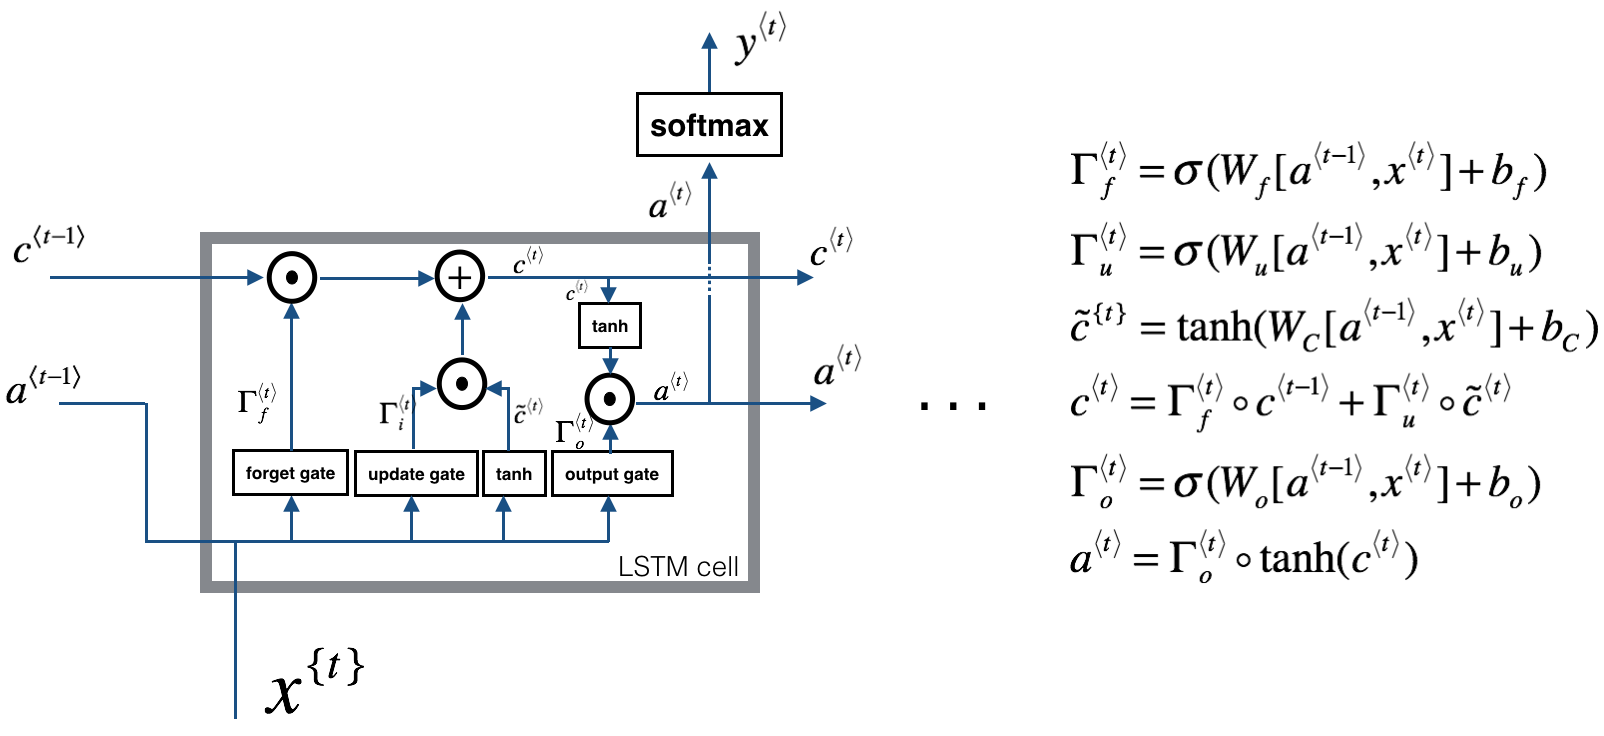
**Figure 4**: LSTM-cell. This tracks and updates a "cell state" or memory variable  $c^{⟨t⟩}$  at every time-step, which can be different from  $a^{⟨t⟩}$ .

Similar to the RNN example above, you will start by implementing the LSTM cell for a single time-step. Then you can iteratively call it from inside a for-loop to have it process an input with  $T_x$  time-steps.

## About the gates
- **Forget gate**

For the sake of this illustration, lets assume we are reading words in a piece of text, and want use an LSTM to keep track of grammatical structures, such as whether the subject is singular or plural. If the subject changes from a singular word to a plural word, we need to find a way to get rid of our previously stored memory value of the singular/plural state. In an LSTM, the forget gate lets us do this:

$$Γ^{⟨t⟩}_f=σ(W_f[a^{⟨t−1⟩},x^{⟨t⟩}]+b_f)         \ldots(1)$$ 

Here,  $W_f$  are weights that govern the forget gate's behavior. We concatenate  $[a^{⟨t−1⟩},x^{⟨t⟩}]$  and multiply by  $W_f$ . The equation above results in a vector  $Γ^{⟨t⟩}_f$  with values between 0 and 1. This forget gate vector will be multiplied element-wise by the previous cell state  $c^{⟨t−1⟩}$ . So if one of the values of  $Γ^{⟨t⟩}_f$  is 0 (or close to 0) then it means that the LSTM should remove that piece of information (e.g. the singular subject) in the corresponding component of  $c^{⟨t−1⟩}$ . If one of the values is 1, then it will keep the information.

- **Update gate**
Once we forget that the subject being discussed is singular, we need to find a way to update it to reflect that the new subject is now plural. Here is the formulat for the update gate:

$$ Γ^{⟨t⟩}_u=σ(W_u[a^{⟨t−1⟩},x^{t}]+b_u)\ldots(2)$$
Similar to the forget gate, here  $Γ^{⟨t⟩}_u$  is again a vector of values between 0 and 1. This will be multiplied element-wise with $ c^{~⟨t⟩}$ , in order to compute  $c^{⟨t⟩}$ .

- **Updating the cell**
To update the new subject we need to create a new vector of numbers that we can add to our previous cell state. The equation we use is:

$$ c^{~⟨t⟩}=tanh(W_c[a^{⟨t−1⟩},x^{⟨t⟩}]+b_c) \ldots(3)$$
Finally, the new cell state is:

$$ c^{⟨t⟩}=Γ^{⟨t⟩}_f∗c^{⟨t−1⟩}+Γ^{⟨t⟩}_u∗c^{~⟨t⟩} \ldots(4)$$

- **Output gate**
To decide which outputs we will use, we will use the following two formulas:

$$ Γ^{⟨t⟩}_o=σ(W_o[a^{⟨t−1⟩},x^{⟨t⟩}]+b_o)  \ldots(5)$$
$$ a^{⟨t⟩} =Γ^{⟨t⟩}_o∗tanh(c^{⟨t⟩})  \ldots(6)$$
Where in equation 5 you decide what to output using a sigmoid function and in equation 6 you multiply that by the  tanh  of the previous state.

**LSTM cell**
**Exercise**: Implement the LSTM cell described in the Figure (3).

**Instructions**:

1. Concatenate  a^{⟨t−1⟩}  and  x^{⟨t⟩}  in a single matrix:  concat=[a^{⟨t−1⟩}x^{⟨t⟩}] 
2. Compute all the formulas 1-6. You can use sigmoid() (provided) and np.tanh().
3. Compute the prediction  y^{⟨t⟩} . You can use softmax() (provided).

In [7]:
def lstm_cell_forward(xt, a_prev, c_prev, parameters):
    """
    Implement a single forward step of the LSTM-cell as described in Figure (4)

    Arguments:
    xt -- your input data at timestep "t", numpy array of shape (n_x, m).
    a_prev -- Hidden state at timestep "t-1", numpy array of shape (n_a, m)
    c_prev -- Memory state at timestep "t-1", numpy array of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wf -- Weight matrix of the forget gate, numpy array of shape (n_a, n_a + n_x)
                        bf -- Bias of the forget gate, numpy array of shape (n_a, 1)
                        Wi -- Weight matrix of the update gate, numpy array of shape (n_a, n_a + n_x)
                        bi -- Bias of the update gate, numpy array of shape (n_a, 1)
                        Wc -- Weight matrix of the first "tanh", numpy array of shape (n_a, n_a + n_x)
                        bc --  Bias of the first "tanh", numpy array of shape (n_a, 1)
                        Wo -- Weight matrix of the output gate, numpy array of shape (n_a, n_a + n_x)
                        bo --  Bias of the output gate, numpy array of shape (n_a, 1)
                        Wy -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
                        
    Returns:
    a_next -- next hidden state, of shape (n_a, m)
    c_next -- next memory state, of shape (n_a, m)
    yt_pred -- prediction at timestep "t", numpy array of shape (n_y, m)
    cache -- tuple of values needed for the backward pass, contains (a_next, c_next, a_prev, c_prev, xt, parameters)
    
    Note: ft/it/ot stand for the forget/update/output gates, cct stands for the candidate value (c tilde),
          c stands for the memory value
    """

    # Retrieve parameters from "parameters"
    Wf = parameters["Wf"]
    bf = parameters["bf"]
    Wi = parameters["Wi"]
    bi = parameters["bi"]
    Wc = parameters["Wc"]
    bc = parameters["bc"]
    Wo = parameters["Wo"]
    bo = parameters["bo"]
    Wy = parameters["Wy"]
    by = parameters["by"]
    
    # Retrieve dimensions from shapes of xt and Wy
    n_x, m = xt.shape
    n_y, n_a = Wy.shape

    ### START CODE HERE ###
    # Concatenate a_prev and xt (≈3 lines)
    concat = np.zeros((n_a + n_x, m))
    concat[: n_a, :] = a_prev
    concat[n_a :, :] = xt
    # Compute values for ft, it, cct, c_next, ot, a_next using the formulas given figure (4) (≈6 lines)
    ft = sigmoid(np.dot(Wf, concat) + bf)
    it = sigmoid(np.dot(Wi, concat) + bi)
    cct = np.tanh(np.dot(Wc, concat) + bc)
    c_next = ft * c_prev + it * cct 
    ot = sigmoid(np.dot(Wo, concat) + bo)
    a_next = ot * np.tanh(c_next)    
    # Compute prediction of the LSTM cell (≈1 line)
    yt_pred = softmax(np.dot(Wy, a_next) + by)
    ### END CODE HERE ###

    # store values needed for backward propagation in cache
    cache = (a_next, c_next, a_prev, c_prev, ft, it, cct, ot, xt, parameters)

    return a_next, c_next, yt_pred, cache

In [8]:
np.random.seed(1)
xt = np.random.randn(3,10)
a_prev = np.random.randn(5,10)
c_prev = np.random.randn(5,10)
Wf = np.random.randn(5, 5+3)
bf = np.random.randn(5,1)
Wi = np.random.randn(5, 5+3)
bi = np.random.randn(5,1)
Wo = np.random.randn(5, 5+3)
bo = np.random.randn(5,1)
Wc = np.random.randn(5, 5+3)
bc = np.random.randn(5,1)
Wy = np.random.randn(2,5)
by = np.random.randn(2,1)

parameters = {"Wf": Wf, "Wi": Wi, "Wo": Wo, "Wc": Wc, "Wy": Wy, "bf": bf, "bi": bi, "bo": bo, "bc": bc, "by": by}

a_next, c_next, yt, cache = lstm_cell_forward(xt, a_prev, c_prev, parameters)
print("a_next[4] = ", a_next[4])
print("a_next.shape = ", c_next.shape)
print("c_next[2] = ", c_next[2])
print("c_next.shape = ", c_next.shape)
print("yt[1] =", yt[1])
print("yt.shape = ", yt.shape)
print("cache[1][3] =", cache[1][3])
print("len(cache) = ", len(cache))

a_next[4] =  [-0.66408471  0.0036921   0.02088357  0.22834167 -0.85575339  0.00138482
  0.76566531  0.34631421 -0.00215674  0.43827275]
a_next.shape =  (5, 10)
c_next[2] =  [ 0.63267805  1.00570849  0.35504474  0.20690913 -1.64566718  0.11832942
  0.76449811 -0.0981561  -0.74348425 -0.26810932]
c_next.shape =  (5, 10)
yt[1] = [0.79913913 0.15986619 0.22412122 0.15606108 0.97057211 0.31146381
 0.00943007 0.12666353 0.39380172 0.07828381]
yt.shape =  (2, 10)
cache[1][3] = [-0.16263996  1.03729328  0.72938082 -0.54101719  0.02752074 -0.30821874
  0.07651101 -1.03752894  1.41219977 -0.37647422]
len(cache) =  10


**Expected Output**

|values | output |
|-------|--------|
| a_next[4] = |  [-0.66408471  0.0036921   0.02088357  0.22834167 -0.85575339  0.00138482 0.76566531  0.34631421 -0.00215674  0.43827275]| 
| a_next.shape = |  (5, 10)| 
| c_next[2] = |  [ 0.63267805  1.00570849  0.35504474  0.20690913 -1.64566718  0.11832942 0.76449811 -0.0981561  -0.74348425 -0.26810932]| 
| c_next.shape = |  (5, 10)| 
| yt[1] = | [0.79913913 0.15986619 0.22412122 0.15606108 0.97057211 0.31146381 0.00943007 0.12666353 0.39380172 0.07828381]| 
| yt.shape =  | (2, 10)| 
| cache[1][3] = | [-0.16263996  1.03729328  0.72938082 -0.54101719  0.02752074 -0.30821874 0.07651101 -1.03752894  1.41219977 -0.37647422]| 
| len(cache) = |  10| 